In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
from scipy.optimize import curve_fit

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [2]:
DATA_FOLDER = "20210805_RTStageTestingTip8"
DATA_FOLDERPATH = sio.get_qudiamond_folderpath(DATA_FOLDER)
AFM_QNAMISUBFOLDERPATH = os.path.join(DATA_FOLDERPATH, "Qnami_FR03-2K14")
FIGURE_FOLDERPATH = sio.get_figure_folderpath(DATA_FOLDERPATH)

src.io :: INFO :: Saving 'Qnami_FR03-2K14' to 'C:/Nextcloud\Data_Analysis\20210805_RTStageTestingTip8'
..\src\io.py:191: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figure_path, dpi=dpi, bbox_inches="tight",


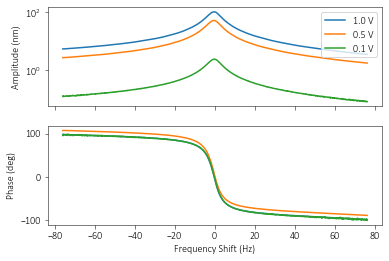

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

for idx in [3, 2, 7]: 
    params, data = sio.read_dat(os.path.join(AFM_QNAMISUBFOLDERPATH, f"frq-sweep00{idx}.dat"))
    freq_shift = data["Frequency Shift (Hz)"].values[2:]
    amplitude = data["Amplitude (m)"].values[2:]
    phase = data["Phase (deg)"].values[2:]

    ax1.plot(freq_shift, amplitude*1e9, label=f"{params['Excitation (V)']} V")
    ax1.set_ylabel("Amplitude (nm)")
    ax1.legend()
    ax1.set_yscale("log")
    
    ax2.plot(freq_shift, phase)
    ax2.set_ylabel(data.columns[3])
    ax2.set_xlabel(data.columns[0])
    
sio.save_figures("Qnami_FR03-2K14", folder=DATA_FOLDER)

In [21]:
params, data = sio.read_dat(os.path.join(AFM_QNAMISUBFOLDERPATH, "SignalAnalyzer_Spectrum001.dat"))

src.io :: INFO :: Saving 'SignalAnalyzer_Spectrum001' to 'C:/Nextcloud\Data_Analysis\20210805_RTStageTestingTip8'
..\src\io.py:191: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figure_path, dpi=dpi, bbox_inches="tight",


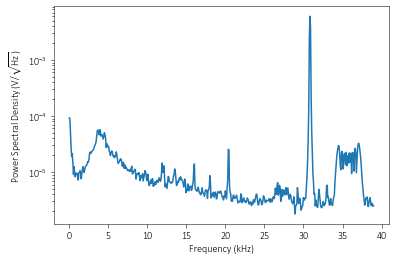

In [35]:
freq = data["Frequency (Hz)"].values / 1e3
psd = data["Input 1 PowerSpectralDensity (V/sqrt(Hz))"].values

fig, ax = plt.subplots()

ax.plot(freq, psd)
ax.set_ylabel("Power Spectral Density ($V / \sqrt{Hz}$)")
ax.set_xlabel("Frequency (kHz)")

ax.set_yscale("log")
sio.save_figures("SignalAnalyzer_Spectrum001", folder=DATA_FOLDER)